In [1]:
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [2]:
# Read the csv data

df_cr = pd.read_csv('indonesia_food_price_chili_red_median.csv')

In [3]:
df_cr.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,date,mp_price_edit
0,116.0,Indonesia,0,NaN,974,National Average,91,Chili (red) - Retail,0.0,IDR,15,Retail,5,KG,1,2007,24974.0693,2007-01-01,24974.0693
1,116.0,Indonesia,0,NaN,974,National Average,91,Chili (red) - Retail,0.0,IDR,15,Retail,5,KG,2,2007,22593.0000,2007-02-01,22593.0000
2,116.0,Indonesia,0,NaN,974,National Average,91,Chili (red) - Retail,0.0,IDR,15,Retail,5,KG,3,2007,22807.0000,2007-03-01,22807.0000
3,116.0,Indonesia,0,NaN,974,National Average,91,Chili (red) - Retail,0.0,IDR,15,Retail,5,KG,4,2007,18414.0000,2007-04-01,18414.0000
4,116.0,Indonesia,0,NaN,974,National Average,91,Chili (red) - Retail,0.0,IDR,15,Retail,5,KG,5,2007,14910.0000,2007-05-01,14910.0000


In [4]:
train = df_cr[0:125] #train 0-124
test = df_cr[125:len(df_cr)] #test 125-155

In [5]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

In [6]:
TRAIN_SPLIT = 90

In [7]:
tf.random.set_seed(13)

In [8]:
uni_data = train['mp_price_edit']
uni_data.index = train['date']
uni_data.head()

date
2007-01-01    24974.0693
2007-02-01    22593.0000
2007-03-01    22807.0000
2007-04-01    18414.0000
2007-05-01    14910.0000
Name: mp_price_edit, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020EDD859EB8>],
      dtype=object)

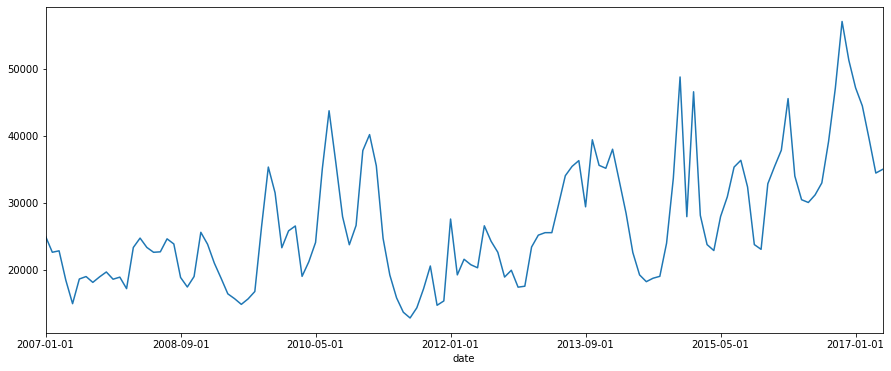

In [9]:
#Plot The Data

fig = plt.figure(figsize=(15,6))
uni_data.plot(subplots=True)

In [10]:
uni_data = uni_data.values

In [11]:
uni_data.shape

(125,)

In [12]:
# Standardize the data
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()

In [13]:
uni_data = (uni_data-uni_train_mean)/uni_train_std

In [14]:
uni_data

array([ 1.71218240e-01, -1.66658611e-01, -1.36291731e-01, -7.59664182e-01,
       -1.25688637e+00, -7.33838144e-01, -6.81476561e-01, -8.05214502e-01,
       -6.88429725e-01, -5.84699868e-01, -7.38237085e-01, -6.94247679e-01,
       -9.37892227e-01, -6.51991751e-02,  1.33604559e-01, -6.37801620e-02,
       -1.67084315e-01, -1.57576927e-01,  1.17853514e-01,  9.15711096e-03,
       -7.00917040e-01, -9.03126406e-01, -6.81050857e-01,  2.56632994e-01,
        3.19725597e-03, -3.96680633e-01, -7.16526184e-01, -1.04829145e+00,
       -1.15074921e+00, -1.27132943e+00, -1.15568585e+00, -9.98947549e-01,
        3.78810021e-01,  1.63988696e+00,  1.09356692e+00, -7.07333261e-02,
        2.87425578e-01,  3.90729731e-01, -6.77361423e-01, -3.67307062e-01,
        4.19363134e-02,  1.60313452e+00,  2.83356077e+00,  1.73325802e+00,
        5.87972551e-01, -7.30344091e-03,  4.01939935e-01,  1.98995749e+00,
        2.32825021e+00,  1.66528729e+00,  1.28638013e-01, -6.49264964e-01,
       -1.13357413e+00, -

In [15]:
univariate_past_history = 30

univariate_future_target = 0

x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)

In [16]:
print ('Single window of past history')
print (x_train_uni[0])
print ('\n Target price to predict')
print (y_train_uni[0])

Single window of past history
[[ 0.17121824]
 [-0.16665861]
 [-0.13629173]
 [-0.75966418]
 [-1.25688637]
 [-0.73383814]
 [-0.68147656]
 [-0.8052145 ]
 [-0.68842973]
 [-0.58469987]
 [-0.73823708]
 [-0.69424768]
 [-0.93789223]
 [-0.06519918]
 [ 0.13360456]
 [-0.06378016]
 [-0.16708432]
 [-0.15757693]
 [ 0.11785351]
 [ 0.00915711]
 [-0.70091704]
 [-0.90312641]
 [-0.68105086]
 [ 0.25663299]
 [ 0.00319726]
 [-0.39668063]
 [-0.71652618]
 [-1.04829145]
 [-1.15074921]
 [-1.27132943]]

 Target price to predict
-1.1556858466847661


In [17]:
def create_time_steps(length):
  return list(range(-length, 0))

In [18]:
def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

In [34]:
BATCH_SIZE = 30
BUFFER_SIZE = 10000

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [35]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(1, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1, activation = 'linear')
])

simple_lstm_model.compile(optimizer='adam', loss='mse')

In [36]:
EVALUATION_INTERVAL = 30
EPOCHS = 250

single_step_history = simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=30)

Train for 30 steps, validate for 30 steps
Epoch 1/250
30/30 [==============================] - 4s 124ms/step - loss: 1.3116 - val_loss: 6.1720
Epoch 2/250
30/30 [==============================] - 1s 29ms/step - loss: 1.2851 - val_loss: 5.9665
Epoch 3/250
30/30 [==============================] - 1s 29ms/step - loss: 1.2654 - val_loss: 5.7832
Epoch 4/250
30/30 [==============================] - 1s 28ms/step - loss: 1.2512 - val_loss: 5.6262
Epoch 5/250
30/30 [==============================] - 1s 26ms/step - loss: 1.2406 - val_loss: 5.4878
Epoch 6/250
30/30 [==============================] - 1s 28ms/step - loss: 1.2314 - val_loss: 5.3280
Epoch 7/250
30/30 [==============================] - 1s 28ms/step - loss: 1.2195 - val_loss: 5.0362
Epoch 8/250
30/30 [==============================] - 1s 26ms/step - loss: 1.1999 - val_loss: 4.7323
Epoch 9/250
30/30 [==============================] - 1s 26ms/step - loss: 1.1737 - val_loss: 4.5133
Epoch 10/250
30/30 [==============================] - 1s 

Epoch 82/250
30/30 [==============================] - 1s 25ms/step - loss: 0.5244 - val_loss: 1.4953
Epoch 83/250
30/30 [==============================] - 1s 24ms/step - loss: 0.5225 - val_loss: 1.4834
Epoch 84/250
30/30 [==============================] - 1s 28ms/step - loss: 0.5207 - val_loss: 1.4708
Epoch 85/250
30/30 [==============================] - 1s 27ms/step - loss: 0.5189 - val_loss: 1.4606
Epoch 86/250
30/30 [==============================] - 1s 35ms/step - loss: 0.5172 - val_loss: 1.4495
Epoch 87/250
30/30 [==============================] - 1s 34ms/step - loss: 0.5156 - val_loss: 1.4391
Epoch 88/250
30/30 [==============================] - 1s 26ms/step - loss: 0.5140 - val_loss: 1.4284
Epoch 89/250
30/30 [==============================] - 1s 28ms/step - loss: 0.5125 - val_loss: 1.4173
Epoch 90/250
30/30 [==============================] - 1s 35ms/step - loss: 0.5111 - val_loss: 1.4080
Epoch 91/250
30/30 [==============================] - 1s 35ms/step - loss: 0.5097 - val_los

30/30 [==============================] - 1s 38ms/step - loss: 0.4712 - val_loss: 1.0427
Epoch 163/250
30/30 [==============================] - 1s 37ms/step - loss: 0.4709 - val_loss: 1.0396
Epoch 164/250
30/30 [==============================] - 1s 33ms/step - loss: 0.4707 - val_loss: 1.0370
Epoch 165/250
30/30 [==============================] - 1s 29ms/step - loss: 0.4704 - val_loss: 1.0347
Epoch 166/250
30/30 [==============================] - 1s 29ms/step - loss: 0.4702 - val_loss: 1.0319
Epoch 167/250
30/30 [==============================] - 1s 27ms/step - loss: 0.4699 - val_loss: 1.0288
Epoch 168/250
30/30 [==============================] - 1s 26ms/step - loss: 0.4697 - val_loss: 1.0254
Epoch 169/250
30/30 [==============================] - 1s 33ms/step - loss: 0.4695 - val_loss: 1.0226
Epoch 170/250
30/30 [==============================] - 1s 36ms/step - loss: 0.4692 - val_loss: 1.0204
Epoch 171/250
30/30 [==============================] - 1s 36ms/step - loss: 0.4690 - val_loss: 1

30/30 [==============================] - 1s 35ms/step - loss: 0.4453 - val_loss: 0.8572
Epoch 243/250
30/30 [==============================] - 1s 23ms/step - loss: 0.4449 - val_loss: 0.8566
Epoch 244/250
30/30 [==============================] - 1s 31ms/step - loss: 0.4445 - val_loss: 0.8577
Epoch 245/250
30/30 [==============================] - 1s 25ms/step - loss: 0.4440 - val_loss: 0.8592
Epoch 246/250
30/30 [==============================] - 1s 24ms/step - loss: 0.4436 - val_loss: 0.8594
Epoch 247/250
30/30 [==============================] - 1s 31ms/step - loss: 0.4431 - val_loss: 0.8610
Epoch 248/250
30/30 [==============================] - 1s 34ms/step - loss: 0.4425 - val_loss: 0.8618
Epoch 249/250
30/30 [==============================] - 1s 26ms/step - loss: 0.4419 - val_loss: 0.8630
Epoch 250/250
30/30 [==============================] - 1s 27ms/step - loss: 0.4413 - val_loss: 0.8641


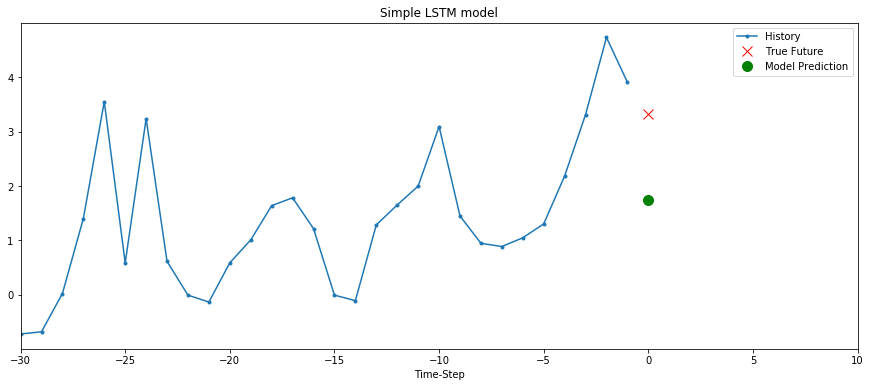

In [37]:
for x, y in val_univariate.take(1):
  fig = plt.figure(figsize=(15,6))
  plot = show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model')
  plot.show()

In [38]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

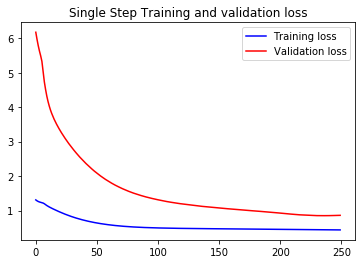

In [39]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')

In [40]:
test_data = test['mp_price_edit']
test_data.index = test['date']
test_data.head()

date
2017-06-01    31731.0
2017-08-01    31008.0
2017-09-01    31433.0
2017-10-01    33190.0
2017-11-01    36144.0
Name: mp_price_edit, dtype: float64

In [41]:
test_data = test_data.values

In [42]:
test_data = (test_data-uni_train_mean)/uni_train_std

In [43]:
univariate_future_target = 0

x_test, y_test = univariate_data(uni_data, 0, len(test_data)+1,
                                           len(test_data),
                                           univariate_future_target)

In [44]:
x_test.shape

(1, 30, 1)

In [45]:
y_test.shape

(1,)

In [46]:
results = simple_lstm_model.evaluate(x_test, y_test, batch_size=30)

1/1 [==============================] - 1s 890ms/sample - loss: 0.1407


In [47]:
simple_lstm_model.save_weights("chili.h30")

In [62]:
# Read the csv data

df_cbe = pd.read_csv('indonesia_food_price_chili_birdeye_median.csv')

In [67]:
uni_cbe = df_cbe['mp_price_edit']
uni_cbe.index = df_cbe['date']
uni_cbe.head()

date
2007-01-01    16825.1196
2007-02-01    13373.0000
2007-03-01    15360.0000
2007-04-01    13347.0000
2007-05-01    10784.0000
Name: mp_price_edit, dtype: float64

In [68]:
uni_cbe = uni_cbe.values

In [69]:
# Standardize the data
uni_cbe_mean = uni_cbe.mean()
uni_cbe_std = uni_cbe.std()

In [70]:
uni_cbe = (uni_cbe-uni_cbe_mean)/uni_cbe_std

In [71]:
univariate_past_history = 30
univariate_future_target = 0

x_train_cbe_uni, y_train_cbe_uni = univariate_data(uni_cbe, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)

In [72]:
x_train_cbe_uni.shape

(95, 30, 1)

In [73]:
y_train_cbe_uni.shape

(95,)

In [74]:
results_cbe = simple_lstm_model.evaluate(x_train_cbe_uni, y_train_cbe_uni, batch_size=30)

95/95 [==============================] - 0s 440us/sample - loss: 0.3186


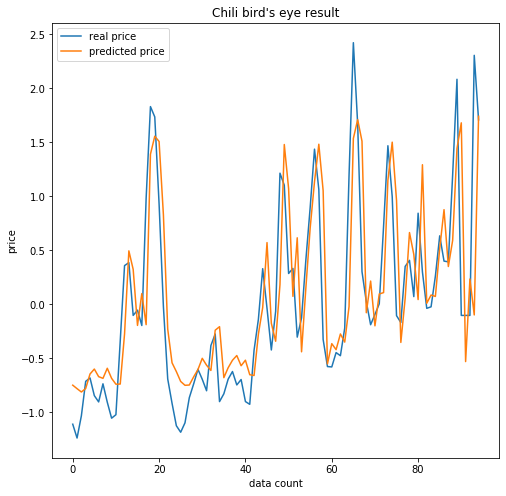

In [76]:
preds = simple_lstm_model.predict(x_train_cbe_uni, batch_size=30)

plt.figure(figsize=(8,8))
plt.plot(list(range(0, y_train_cbe_uni.shape[0])), y_train_cbe_uni.flatten())
plt.plot(list(range(0, preds.shape[0])), preds.flatten())
plt.xlabel('data count')
plt.ylabel('price')
plt.title("Chili bird's eye result")
plt.legend(['real price', 'predicted price'], loc='upper left')
plt.show()